In [43]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import KNNImputer

In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
X = df[["Age","Pclass"]]
y = df["Survived"]
X.isna().sum(),y.isna().sum()

(Age       177
 Pclass      0
 dtype: int64,
 0)

In [46]:
##remove rows with na
# df.loc[df["Age"].notna(), ["Age","Pclass"]]

In [47]:
imputer = KNNImputer()
X = imputer.fit_transform(X)
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


array([[22. ,  3. ],
       [38. ,  1. ],
       [26. ,  3. ],
       ...,
       [23.2,  3. ],
       [26. ,  1. ],
       [32. ,  3. ]])

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)

In [49]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


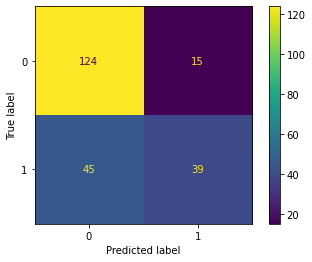

In [50]:
disp = plot_confusion_matrix(clf, X_test, y_test)

In [51]:
disp.confusion_matrix

array([[124,  15],
       [ 45,  39]], dtype=int64)